# 1. Imports


In [214]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
!pip install textblob_de
import textblob_de
from textblob_de import TextBlobDE
from textblob import Word
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


[nltk_data] Downloading package wordnet to /home/arina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/arina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/arina/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/arina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/arina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [215]:
r = requests.get('https://www.yelp.com/not_recommended_reviews/bagel-brothers-leipzig')

In [216]:
r.status_code

200

In [217]:
r.text

'<!DOCTYPE HTML>\n\n<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en-US"> <![endif]-->\n<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en-US"> <![endif]-->\n<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en-US"> <![endif]-->\n<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en-US"> <![endif]-->\n<!--[if (gt IE 9)|!(IE)]><!--> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="no-js" lang="en-US"> <!--<![endif]-->\n    <head>\n        <script nonce="62f8b4c4">\n            (function() {\n                var main = null;\n\n                var main=function(){window.onerror=function(k,a,c,i,f){var j=(document.getElementsByTagName("html")[0].getAttribute("webdriver")==="true"||navigator.userAgent==="selenium");var h=f&&(f.name==="ServerSideRenderingError"||

In [218]:
soup = BeautifulSoup(r.text, 'html.parser')

In [219]:
divs = soup.find_all(class_="review-content")

In [220]:
reviews = []
for div in divs:
   reviews.append(div.find('p').text)

# Analyzing the Data

In [221]:
df = pd.DataFrame(np.array(reviews), columns = ['review'])

In [222]:
df.head()

,review
0,Die Bedienung zum Sonntagnachmittag durch eine...
1,"Immer frisch, immer lecker und preislich absol..."
2,Ich liebe liebe liebe die Bagels hier. Ich gla...
3,Echt lecker. Vor allem der frisch gepresste O-...
4,Am ende der Einkaufsstraße in Leipzig gibt es ...


In [223]:
len(df['review'])

9

In [224]:
#It gave us a length of each review

df['review'].apply(lambda x: len(x.split()))

0     61
1     21
2    105
3     82
4     53
5     17
6     99
7     12
8     17
Name: review, dtype: int64

In [225]:
df['word_count'] = df['review'].apply(lambda x: len(x.split()))

In [226]:
df.head()

,review,word_count
0,Die Bedienung zum Sonntagnachmittag durch eine...,61
1,"Immer frisch, immer lecker und preislich absol...",21
2,Ich liebe liebe liebe die Bagels hier. Ich gla...,105
3,Echt lecker. Vor allem der frisch gepresste O-...,82
4,Am ende der Einkaufsstraße in Leipzig gibt es ...,53


In [227]:
# Counting the characters and adding it to the DF
df['character_count'] = df['review'].apply(lambda x: len(x))

In [228]:
df.head()

,review,word_count,character_count
0,Die Bedienung zum Sonntagnachmittag durch eine...,61,408
1,"Immer frisch, immer lecker und preislich absol...",21,138
2,Ich liebe liebe liebe die Bagels hier. Ich gla...,105,630
3,Echt lecker. Vor allem der frisch gepresste O-...,82,494
4,Am ende der Einkaufsstraße in Leipzig gibt es ...,53,333


In [229]:
def average_words(x):
    words = x.split()
    return sum(len(words) for words in words) / len(words)

In [230]:
df['average_word_length'] = df['review'].apply(lambda x: average_words(x))

In [231]:
stop_words = stopwords.words('german')

In [232]:
df['stopword_count'] = df['review'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

In [233]:
# Counting and adding rate of stop words in relation to all words
df['stopword_rate'] = df['stopword_count'] / df['word_count']

In [234]:
df.sort_values(by = 'stopword_rate')

,review,word_count,character_count,average_word_length,stopword_count,stopword_rate
7,Hier gehe ich super gerne snacken. Die 1 mit S...,12,59,4.000000,2,0.166667
1,"Immer frisch, immer lecker und preislich absol...",21,138,5.619048,5,0.238095
5,Ist immer wieder eine gute Adresse für ein pri...,17,117,5.941176,6,0.352941
8,ein muss bei jedem leipzig-besuch. super bagel...,17,128,6.588235,6,0.352941
4,Am ende der Einkaufsstraße in Leipzig gibt es ...,53,333,5.301887,19,0.358491
0,Die Bedienung zum Sonntagnachmittag durch eine...,61,408,5.704918,23,0.377049
2,Ich liebe liebe liebe die Bagels hier. Ich gla...,105,630,5.009524,41,0.390476
3,Echt lecker. Vor allem der frisch gepresste O-...,82,494,5.036585,34,0.414634
6,Ein Satz vorweg: Ich liebe diese Bagels! :)In ...,99,599,5.060606,42,0.424242


# Data Cleaning

In [235]:
df['lowercase'] = df['review'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [236]:
df['punctuation'] = df['lowercase'].str.replace('[^\w\s]', '')

/tmp/ipykernel_3936/4158296427.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['punctuation'] = df['lowercase'].str.replace('[^\w\s]', '')


In [237]:
stop_words = stopwords.words('german')

In [238]:
df['stopwords'] = df['punctuation'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [239]:
pd.Series(" ".join(df['stopwords']).split()).value_counts()[:30]

bagels           11
liebe             4
super             3
zwei              3
glaube            3
frisch            3
immer             3
gut               3
empfehlen         3
preis             3
mal               3
bagel             3
leipzig           2
gegessen          2
echt              2
lecker            2
service           2
gibt              2
sesam             2
richtig           2
belegt            2
kunden            2
zwischendurch     2
satt              2
bagles            2
bedienung         2
saftig            1
würzig            1
schön             1
art               1
dtype: int64

In [249]:
other_stop_words = ['glaube', 'preis', 'zwischendurch', 'art', 'zwei', 'gegessen','sesam', 'ein']

In [250]:
 df['cleanreviews'] = df['stopwords'].apply(lambda x: "  ".join(word for word in x.split() if word not in other_stop_words))

In [251]:
pd.Series(" ".join(df['cleanreviews']).split()).value_counts()[:30]

bagels       11
liebe         4
immer         3
gut           3
frisch        3
empfehlen     3
mal           3
super         3
bagel         3
belegt        2
bagles        2
gibt          2
lecker        2
satt          2
echt          2
service       2
leipzig       2
bedienung     2
kunden        2
richtig       2
laden         1
höchste       1
schön         1
saftig        1
würzig        1
ists          1
gute          1
drin          1
augen         1
adresse       1
dtype: int64

# Lemmatization of data

In [252]:
df['cleanreviews'].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))

0    bedienung sonntagnachmittag blondgefärbten jün...
1    immer frisch immer lecker preislich absolut ok...
2    liebe liebe liebe bagel getrost varianten empf...
3    echt lecker frisch gepresste osaft carrotcake ...
4    ende einkaufsstraße leipzig gibt netten laden ...
5    immer gute adresse prima frühstück gesunden sn...
6    satz vorweg liebe bagel filialen kette lohnt f...
7                     gehe super gerne snacken 1 bitte
8    leipzigbesuch super bagel freundliche bedienun...
Name: cleanreviews, dtype: object

In [253]:
df['lemmatize'] = df['cleanreviews'].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))

# Sentiment Analysis

In [254]:
df['polarity'] = df['lemmatize'].apply(lambda x: TextBlobDE(x).sentiment.polarity)

In [255]:
df['subjectivity'] = df['lemmatize'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [256]:
df.describe()

,word_count,character_count,average_word_length,stopword_count,stopword_rate,polarity,subjectivity
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,51.888889,322.888889,5.362442,19.777778,0.341726,0.830556,0.277778
std,37.099341,221.182303,0.724775,16.091751,0.084902,0.276637,0.333333
min,12.000000,59.000000,4.000000,2.000000,0.166667,0.150000,0.000000
25%,17.000000,128.000000,5.036585,6.000000,0.352941,0.850000,0.000000
50%,53.000000,333.000000,5.301887,19.000000,0.358491,0.900000,0.000000
75%,82.000000,494.000000,5.704918,34.000000,0.390476,1.000000,0.666667
max,105.000000,630.000000,6.588235,42.000000,0.424242,1.000000,0.666667


In [257]:
df.head(10)

,review,word_count,character_count,average_word_length,stopword_count,stopword_rate,lowercase,punctuation,stopwords,cleanreviews,lemmatize,polarity,subjectivity
0,Die Bedienung zum Sonntagnachmittag durch eine...,61,408,5.704918,23,0.377049,die bedienung zum sonntagnachmittag durch eine...,die bedienung zum sonntagnachmittag durch eine...,bedienung sonntagnachmittag blondgefärbten jün...,bedienung sonntagnachmittag blondgefärbten ...,bedienung sonntagnachmittag blondgefärbten jün...,0.150,0.000000
1,"Immer frisch, immer lecker und preislich absol...",21,138,5.619048,5,0.238095,"immer frisch, immer lecker und preislich absol...",immer frisch immer lecker und preislich absolu...,immer frisch immer lecker preislich absolut ok...,immer frisch immer lecker preislich absol...,immer frisch immer lecker preislich absolut ok...,0.900,0.500000
2,Ich liebe liebe liebe die Bagels hier. Ich gla...,105,630,5.009524,41,0.390476,ich liebe liebe liebe die bagels hier. ich gla...,ich liebe liebe liebe die bagels hier ich glau...,liebe liebe liebe bagels glaube getrost varian...,liebe liebe liebe bagels getrost variante...,liebe liebe liebe bagel getrost varianten empf...,0.675,0.666667
3,Echt lecker. Vor allem der frisch gepresste O-...,82,494,5.036585,34,0.414634,echt lecker. vor allem der frisch gepresste o-...,echt lecker vor allem der frisch gepresste osa...,echt lecker frisch gepresste osaft carrotcake ...,echt lecker frisch gepresste osaft carrot...,echt lecker frisch gepresste osaft carrotcake ...,0.900,0.000000
4,Am ende der Einkaufsstraße in Leipzig gibt es ...,53,333,5.301887,19,0.358491,am ende der einkaufsstraße in leipzig gibt es ...,am ende der einkaufsstraße in leipzig gibt es ...,ende einkaufsstraße leipzig gibt netten laden ...,ende einkaufsstraße leipzig gibt netten l...,ende einkaufsstraße leipzig gibt netten laden ...,1.000,0.000000
5,Ist immer wieder eine gute Adresse für ein pri...,17,117,5.941176,6,0.352941,ist immer wieder eine gute adresse für ein pri...,ist immer wieder eine gute adresse für ein pri...,immer gute adresse prima frühstück gesunden sn...,immer gute adresse prima frühstück gesund...,immer gute adresse prima frühstück gesunden sn...,1.000,0.000000
6,Ein Satz vorweg: Ich liebe diese Bagels! :)In ...,99,599,5.060606,42,0.424242,ein satz vorweg: ich liebe diese bagels! :)in ...,ein satz vorweg ich liebe diese bagels in den ...,satz vorweg liebe bagels filialen kette lohnt ...,satz vorweg liebe bagels filialen kette ...,satz vorweg liebe bagel filialen kette lohnt f...,1.000,0.000000
7,Hier gehe ich super gerne snacken. Die 1 mit S...,12,59,4.000000,2,0.166667,hier gehe ich super gerne snacken. die 1 mit s...,hier gehe ich super gerne snacken die 1 mit se...,gehe super gerne snacken 1 sesam bitte,gehe super gerne snacken 1 bitte,gehe super gerne snacken 1 bitte,1.000,0.666667
8,ein muss bei jedem leipzig-besuch. super bagel...,17,128,6.588235,6,0.352941,ein muss bei jedem leipzig-besuch. super bagel...,ein muss bei jedem leipzigbesuch super bagels ...,leipzigbesuch super bagels freundliche bedienu...,leipzigbesuch super bagels freundliche bed...,leipzigbesuch super bagel freundliche bedienun...,0.850,0.666667


<AxesSubplot: title={'center': 'Distribution of sentiment scores'}, ylabel='Frequency'>

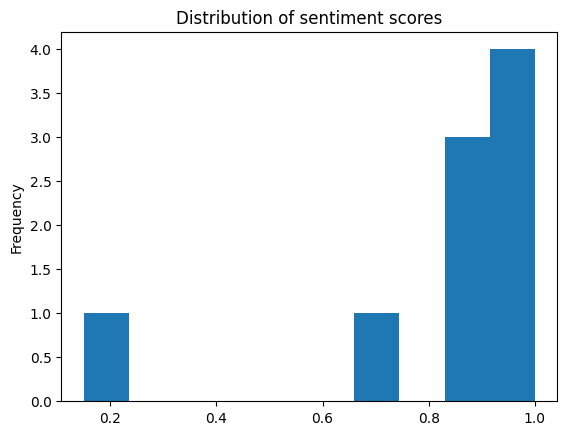

In [265]:
df.polarity.plot(kind='hist', title='Distribution of sentiment scores')

<AxesSubplot: title={'center': 'Subjectivity score'}, ylabel='Frequency'>

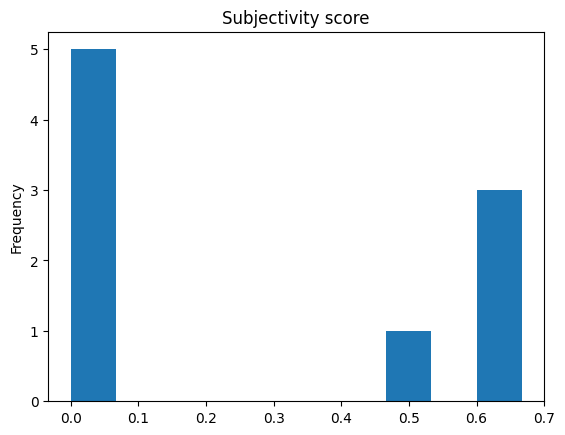

In [268]:
df.subjectivity.plot(kind='hist', title='Subjectivity score')